In [14]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("E:\\DSCT\\All data\\fake-news US Dataset\\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [17]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [18]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
df['label'].value_counts()

0    10387
1     9855
Name: label, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


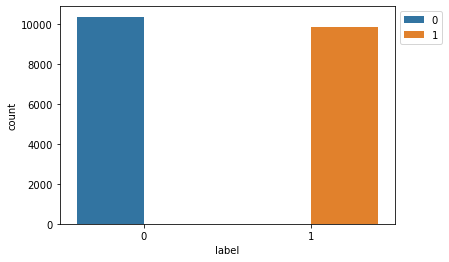

In [38]:
sns.countplot('label',hue='label', data=df)
plt.legend(bbox_to_anchor = (1,1))

In [39]:
df.columns

Index(['index', 'id', 'title', 'label'], dtype='object')

In [40]:
df = df[['id','title','label']]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 474.5+ KB


In [42]:
df = df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 474.5+ KB


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


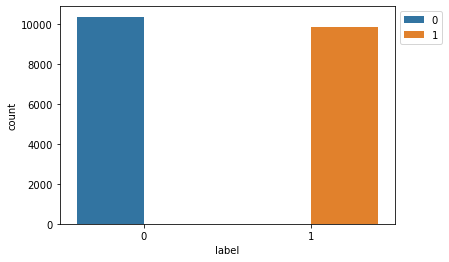

In [44]:
sns.countplot('label',hue='label', data=df)
plt.legend(bbox_to_anchor = (1,1))

In [45]:
df.head()

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


# creating objects from classses

In [46]:
stemmer = PorterStemmer()
lemmitizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
df.reset_index(inplace = True)

# cleaning data using steammer

In [47]:
corpus=[]
for i in range(len(df)):
    sent = re.sub('[^a-zA-Z]',' ',df['title'][i])
    sent =  sent.lower()
    sent=" ".join([stemmer.stem(word) for word in str(sent).split()])
    sent = " ".join([word for word in str(sent).split() if(word not in stop_words)])
    corpus.append(sent)
    
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'whi truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare dure long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin

# converting data into numbers using CV

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X  = cv.fit_transform(corpus).toarray()

y=df['label']

In [49]:
temp_df = pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,ab,abandon,abba,abc,abduct,abe,abedin,abl,aboard,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# train test split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 3)

In [51]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (16193, 5000)
X_test: (4049, 5000)
y_train: (16193,)
y_test: (4049,)


# model evaluation

In [52]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def model_Eval(y_test,y_pred):
    
    #Step 1: Accuacy, Error, PS, RS, F1S:
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy of model is:",acc)
    print("Error in model is: ",1-acc)
    print("Precision score of model is: ",precision_score(y_test,y_pred,average='weighted'))
    print("Recall score of model is: ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 Score of model is: ",f1_score(y_test,y_pred,average='weighted'))
    print()

    #Step 2: Confusion Matrix:
    print("____Confusion Matric____")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)

    #Step 3: Heatmap: 

    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    #Step 4: Classification report: 

    lab = ['setosa', 'versicolor','virginica']
    print(classification_report(y_test,y_pred,target_names = lab))

# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Final Model for k=3
 #Step 1: Creating Model
ML_Model = KNeighborsClassifier(n_neighbors=3,p=2)

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)

80.24203507038776


Accuracy of model is: 0.8024203507038775
Error in model is:  0.19757964929612248
Precision score of model is:  0.8583279313259836
Recall score of model is:  0.8024203507038775
F1 Score of model is:  0.7962016819074921

____Confusion Matric____
[[1306  795]
 [   5 1943]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

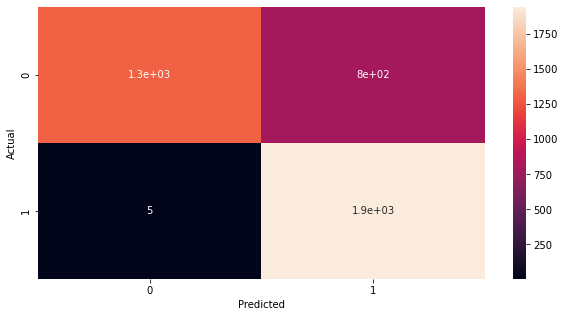

In [54]:
model_Eval(y_test,y_pred)

# GNB

In [55]:
from sklearn.naive_bayes import GaussianNB

ML_Model = GaussianNB()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)

Model created
76.66090392689553


Accuracy of model is: 0.7666090392689553
Error in model is:  0.2333909607310447
Precision score of model is:  0.7700645766839822
Recall score of model is:  0.7666090392689553
F1 Score of model is:  0.7664787059533418

____Confusion Matric____
[[1529  572]
 [ 373 1575]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

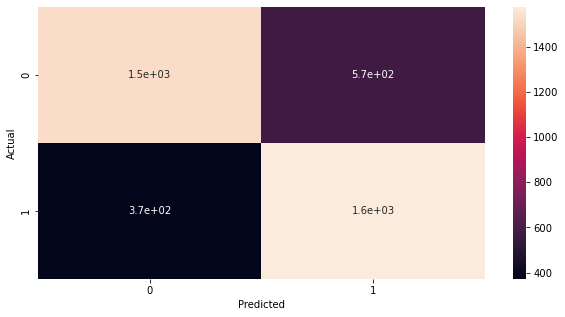

In [56]:
model_Eval(y_test,y_pred)

# SVM

In [57]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

svm_Model = SVC(kernel='linear')
svm_Model.fit(X_train,y_train)
y_pred = svm_Model.predict(X_test)
# acc= svm_Model.score(y_pred,y_test)
# print(acc*100)

Accuracy of model is: 0.9318350209928378
Error in model is:  0.06816497900716223
Precision score of model is:  0.9330160252903309
Recall score of model is:  0.9318350209928378
F1 Score of model is:  0.9318570612186278

____Confusion Matric____
[[1913  188]
 [  88 1860]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

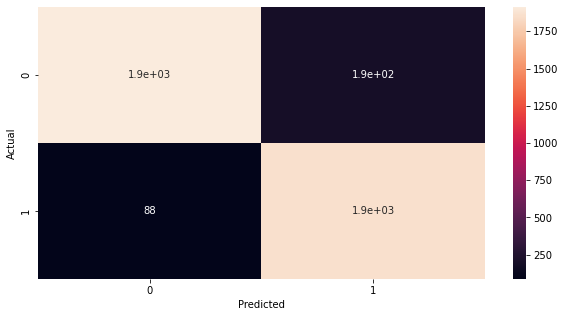

In [58]:
model_Eval(y_test,y_pred)

# Decision Tree

Model created
91.97332674734501
Accuracy of model is: 0.9197332674734502
Error in model is:  0.08026673252654981
Precision score of model is:  0.9201514286442032
Recall score of model is:  0.9197332674734502
F1 Score of model is:  0.9197600733691654

____Confusion Matric____
[[1910  191]
 [ 134 1814]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

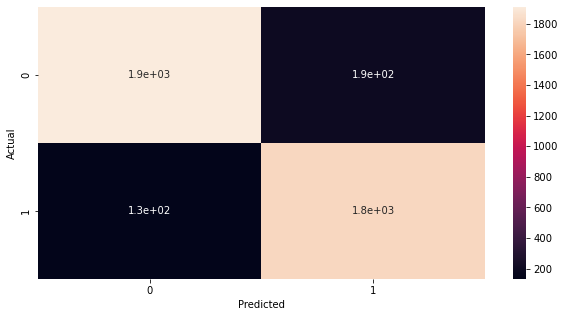

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ML_Model = DecisionTreeClassifier()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Adaboost

Model created
91.94862929118301
Accuracy of model is: 0.91948629291183
Error in model is:  0.08051370708816996
Precision score of model is:  0.925990928358912
Recall score of model is:  0.91948629291183
F1 Score of model is:  0.9193771928715408

____Confusion Matric____
[[1816  285]
 [  41 1907]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

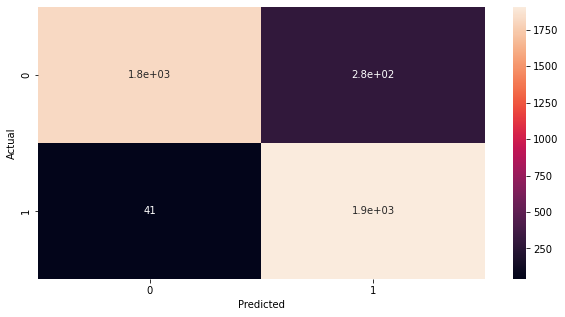

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ML_Model = AdaBoostClassifier(random_state=96)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
add_model = LogisticRegression()
add_model.fit(X_train,y_train)
y_pred = add_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc*100)

93.25759446776982


Accuracy of model is: 0.9325759446776982
Error in model is:  0.06742405532230178
Precision score of model is:  0.9353794697641593
Recall score of model is:  0.9325759446776982
F1 Score of model is:  0.9325733619454551

____Confusion Matric____
[[1886  215]
 [  58 1890]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

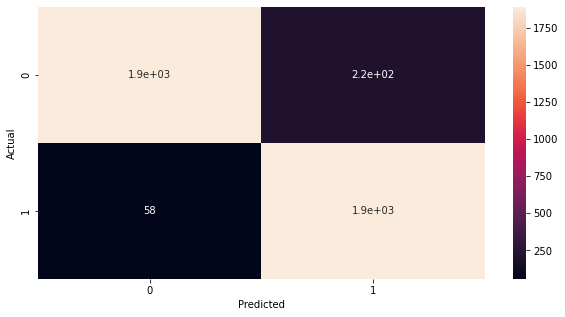

In [64]:
model_Eval(y_test,y_pred)

# RandomForest

Model created
74.48752778463819
Accuracy of model is: 0.7448752778463819
Error in model is:  0.25512472215361814
Precision score of model is:  0.8070880081333955
Recall score of model is:  0.7448752778463819
F1 Score of model is:  0.7281021855126398

____Confusion Matric____
[[2048   53]
 [ 980  968]]


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

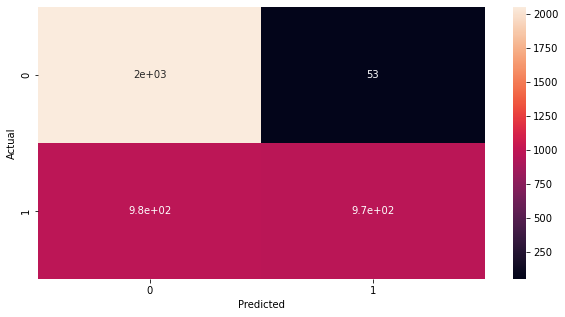

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ML_Model = RandomForestClassifier(max_depth=2)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
Fish_Model = LinearRegression()
Fish_Model.fit(X_train,y_train)
y_pred = Fish_Model.predict(X_test)
acc = Fish_Model.score(X_test,y_test)
print(acc*100)

-5.521424313118908e+22
